In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 501,
    "ct": 201,
    "dx": 2000,
    "dt": 500,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 100,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 100,
}
config.iterations = 10000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1e2,
	"c2": 1e2,
	"d1": 1e2,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
    "s": 1e-8
}
config.save_every = 1000
config.NAME = "0.7"

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 22:04:25, Iteration: 100, Train Loss: 4.7146e+01, c1: 2.0505e-02, c2: 1.5877e-02, d1: 4.3508e-01, d2: 0.0000e+00, l1_reg: 3.0655e+02, l2_reg: 4.3902e+01
2020/09/08, 22:04:26, Iteration: 200, Train Loss: 3.6495e+01, c1: 2.5911e-02, c2: 1.5168e-01, d1: 1.8736e-01, d2: 0.0000e+00, l1_reg: 3.0955e+02, l2_reg: 4.5155e+01
2020/09/08, 22:04:27, Iteration: 300, Train Loss: 3.2347e+01, c1: 1.6013e-02, c2: 1.6012e-01, d1: 1.4733e-01, d2: 0.0000e+00, l1_reg: 3.1071e+02, l2_reg: 4.5637e+01
2020/09/08, 22:04:28, Iteration: 400, Train Loss: 3.0442e+01, c1: 1.6150e-02, c2: 1.4542e-01, d1: 1.4285e-01, d2: 0.0000e+00, l1_reg: 3.1067e+02, l2_reg: 4.5689e+01
2020/09/08, 22:04:29, Iteration: 500, Train Loss: 2.8255e+01, c1: 1.1553e-02, c2: 1.3208e-01, d1: 1.3892e-01, d2: 0.0000e+00, l1_reg: 3.1064e+02, l2_reg: 4.5787e+01
2020/09/08, 22:04:30, Iteration: 600, Train Loss: 2.6545e+01, c1: 1.0118e-02, c2: 1.1961e-01, d1: 1.3572e-01, d2: 0.0000e+00, l1_reg: 3.1057e+02, l2_reg: 4.5886e+01
2020/09/08

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/08, 22:04:34, Iteration: 1100, Train Loss: 2.3821e+01, c1: 3.9902e-02, c2: 6.8155e-02, d1: 1.3015e-01, d2: 0.0000e+00, l1_reg: 3.0936e+02, l2_reg: 4.5807e+01
2020/09/08, 22:04:35, Iteration: 1200, Train Loss: 2.2376e+01, c1: 3.5423e-02, c2: 5.9191e-02, d1: 1.2914e-01, d2: 0.0000e+00, l1_reg: 3.0937e+02, l2_reg: 4.5850e+01
2020/09/08, 22:04:36, Iteration: 1300, Train Loss: 1.9467e+01, c1: 1.8261e-02, c2: 4.7237e-02, d1: 1.2918e-01, d2: 0.0000e+00, l1_reg: 3.0959e+02, l2_reg: 4.5954e+01
2020/09/08, 22:04:37, Iteration: 1400, Train Loss: 1.7786e+01, c1: 1.3163e-02, c2: 3.6231e-02, d1: 1.2846e-01, d2: 0.0000e+00, l1_reg: 3.1000e+02, l2_reg: 4.6097e+01
2020/09/08, 22:04:38, Iteration: 1500, Train Loss: 2.1852e+01, c1: 6.3582e-02, c2: 2.6510e-02, d1: 1.2843e-01, d2: 0.0000e+00, l1_reg: 3.1067e+02, l2_reg: 4.6337e+01
2020/09/08, 22:04:38, Iteration: 1600, Train Loss: 1.4649e+01, c1: 6.2022e-03, c2: 1.2719e-02, d1: 1.2757e-01, d2: 0.0000e+00, l1_reg: 3.1138e+02, l2_reg: 4.6673e+01
2020

2020/09/08, 22:05:16, Iteration: 6100, Train Loss: 7.6736e+00, c1: 6.4274e-03, c2: 4.2085e-03, d1: 6.6100e-02, d2: 0.0000e+00, l1_reg: 3.2665e+02, l2_reg: 5.5291e+01
2020/09/08, 22:05:17, Iteration: 6200, Train Loss: 7.9312e+00, c1: 8.0777e-03, c2: 5.4402e-03, d1: 6.5794e-02, d2: 0.0000e+00, l1_reg: 3.2677e+02, l2_reg: 5.5409e+01
2020/09/08, 22:05:18, Iteration: 6300, Train Loss: 7.9146e+00, c1: 8.1463e-03, c2: 5.7311e-03, d1: 6.5268e-02, d2: 0.0000e+00, l1_reg: 3.2688e+02, l2_reg: 5.5528e+01
2020/09/08, 22:05:19, Iteration: 6400, Train Loss: 7.4201e+00, c1: 5.7881e-03, c2: 3.6324e-03, d1: 6.4781e-02, d2: 0.0000e+00, l1_reg: 3.2703e+02, l2_reg: 5.5638e+01
2020/09/08, 22:05:20, Iteration: 6500, Train Loss: 8.1409e+00, c1: 1.0300e-02, c2: 6.7409e-03, d1: 6.4367e-02, d2: 0.0000e+00, l1_reg: 3.2710e+02, l2_reg: 5.5751e+01
2020/09/08, 22:05:20, Iteration: 6600, Train Loss: 7.7586e+00, c1: 8.5870e-03, c2: 5.0504e-03, d1: 6.3948e-02, d2: 0.0000e+00, l1_reg: 3.2721e+02, l2_reg: 5.5900e+01
2020

In [3]:
config.iterations = 100000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 22:06:23, Iteration: 11000, Train Loss: 6.9895e+00, c1: 8.3206e-03, c2: 6.4715e-03, d1: 5.5103e-02, d2: 0.0000e+00, l1_reg: 3.3322e+02, l2_reg: 5.9810e+01


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/08, 22:06:31, Iteration: 12000, Train Loss: 6.4846e+00, c1: 4.4464e-03, c2: 6.7524e-03, d1: 5.3647e-02, d2: 0.0000e+00, l1_reg: 3.3421e+02, l2_reg: 6.0471e+01
2020/09/08, 22:06:39, Iteration: 13000, Train Loss: 6.0229e+00, c1: 4.0179e-03, c2: 3.7751e-03, d1: 5.2436e-02, d2: 0.0000e+00, l1_reg: 3.3491e+02, l2_reg: 6.1038e+01
2020/09/08, 22:06:48, Iteration: 14000, Train Loss: 6.4121e+00, c1: 4.0957e-03, c2: 7.7217e-03, d1: 5.2304e-02, d2: 0.0000e+00, l1_reg: 3.3541e+02, l2_reg: 6.1592e+01
2020/09/08, 22:06:56, Iteration: 15000, Train Loss: 6.1101e+00, c1: 4.9279e-03, c2: 4.9839e-03, d1: 5.1190e-02, d2: 0.0000e+00, l1_reg: 3.3594e+02, l2_reg: 6.2162e+01
2020/09/08, 22:07:04, Iteration: 16000, Train Loss: 6.0981e+00, c1: 6.0347e-03, c2: 4.2669e-03, d1: 5.0679e-02, d2: 0.0000e+00, l1_reg: 3.3632e+02, l2_reg: 6.2713e+01
2020/09/08, 22:07:12, Iteration: 17000, Train Loss: 5.4059e+00, c1: 2.5509e-03, c2: 2.4394e-03, d1: 4.9069e-02, d2: 0.0000e+00, l1_reg: 3.3658e+02, l2_reg: 6.3234e+0

2020/09/08, 22:13:21, Iteration: 62000, Train Loss: 1.5650e+00, c1: 3.1804e-03, c2: 2.6050e-03, d1: 9.8648e-03, d2: 0.0000e+00, l1_reg: 3.7696e+02, l2_reg: 1.1513e+02
2020/09/08, 22:13:29, Iteration: 63000, Train Loss: 1.4292e+00, c1: 2.2466e-03, c2: 2.5435e-03, d1: 9.5018e-03, d2: 0.0000e+00, l1_reg: 3.7691e+02, l2_reg: 1.1567e+02
2020/09/08, 22:13:37, Iteration: 64000, Train Loss: 1.4455e+00, c1: 2.8037e-03, c2: 2.1731e-03, d1: 9.4784e-03, d2: 0.0000e+00, l1_reg: 3.7714e+02, l2_reg: 1.1628e+02
2020/09/08, 22:13:46, Iteration: 65000, Train Loss: 1.4120e+00, c1: 2.4177e-03, c2: 2.1508e-03, d1: 9.5515e-03, d2: 0.0000e+00, l1_reg: 3.7724e+02, l2_reg: 1.1685e+02
2020/09/08, 22:13:54, Iteration: 66000, Train Loss: 1.4555e+00, c1: 2.7197e-03, c2: 2.7378e-03, d1: 9.0974e-03, d2: 0.0000e+00, l1_reg: 3.7750e+02, l2_reg: 1.1746e+02
2020/09/08, 22:14:02, Iteration: 67000, Train Loss: 1.3927e+00, c1: 2.3766e-03, c2: 2.1760e-03, d1: 9.3746e-03, d2: 0.0000e+00, l1_reg: 3.7765e+02, l2_reg: 1.1806e+0

<IPython.core.display.Javascript object>


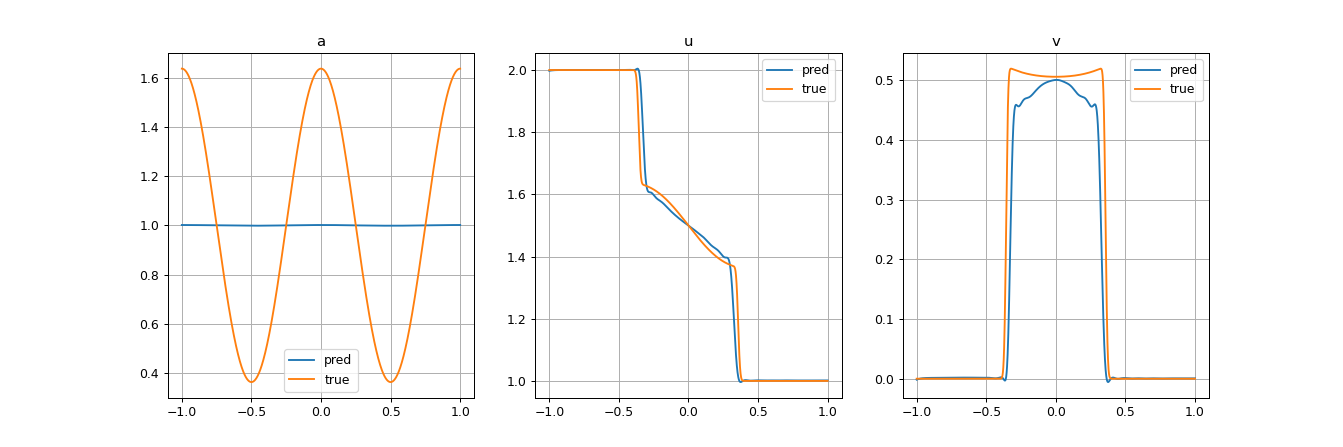

In [4]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 2000).reshape((-1, 1))
a_fn = lambda x: 1+2/np.pi*np.cos(2*np.pi*x)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_2_snapshot_epsilon_0.7.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()

In [ ]:
agent.params[1]